{0, 1, 2, 3, 4, 6, 7, 8}


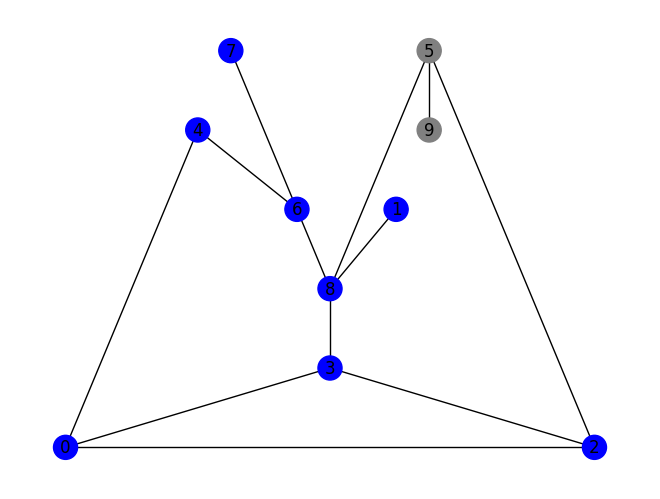

In [2]:
import networkx as nx
from torch import tensor

incidence_matriz = tensor([[0, 0, 0, 1, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 6, 7, 8, 8, 8, 8, 9, 5],
        [2, 3, 4, 8, 0, 3, 5, 0, 2, 8, 0, 6, 2, 8, 4, 7, 8, 6, 1, 3, 5, 6, 5, 9]])
g_n = nx.from_edgelist(incidence_matriz.T.tolist())
x = tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [0.0100],
        [1.0000],
        [1.0000],
        [1.0000],
        [0.0100]])
s = {i for i, v in enumerate(x) if v == 1}

try:
    layout = nx.planar_layout(g_n)
except:
    layout = nx.drawing.spring_layout(g_n)

node_colors = ['blue' if n in s else 'gray' for n in g_n]
nx.draw(g_n, with_labels=True, node_color=node_colors, pos=layout)
print(s)